In [114]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [115]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [116]:
data_path = 'E:\\Train.xlsx'
train = pd.read_excel(data_path)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [117]:
data_path2 = 'E:\\Test.xlsx'
test = pd.read_excel(data_path2)
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [118]:
train.shape

(8523, 12)

In [119]:
test.shape

(5681, 11)

In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [122]:
train.nunique

<bound method DataFrame.nunique of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT0

In [123]:
test.nunique

<bound method DataFrame.nunique of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   


In [124]:
train.columns[train.isna().any()]

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [125]:
test.columns[test.isna().any()]

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [126]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [127]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [128]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [129]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [130]:
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())
test.Item_Weight = test.Item_Weight.fillna(test.Item_Weight.mean())

In [131]:
train.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [132]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [133]:
test.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [134]:
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode()[0])
test.Outlet_Size = test.Outlet_Size.fillna(test.Outlet_Size.mode()[0])

In [135]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [136]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [137]:
train.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [138]:
test.nunique()

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [139]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [140]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [141]:
train.Item_Fat_Content = train.Item_Fat_Content.replace(to_replace=['low fat', 'LF', 'reg'], value=['Low Fat', 'Low Fat', 'Regular'])

In [142]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [143]:
test.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [144]:
test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

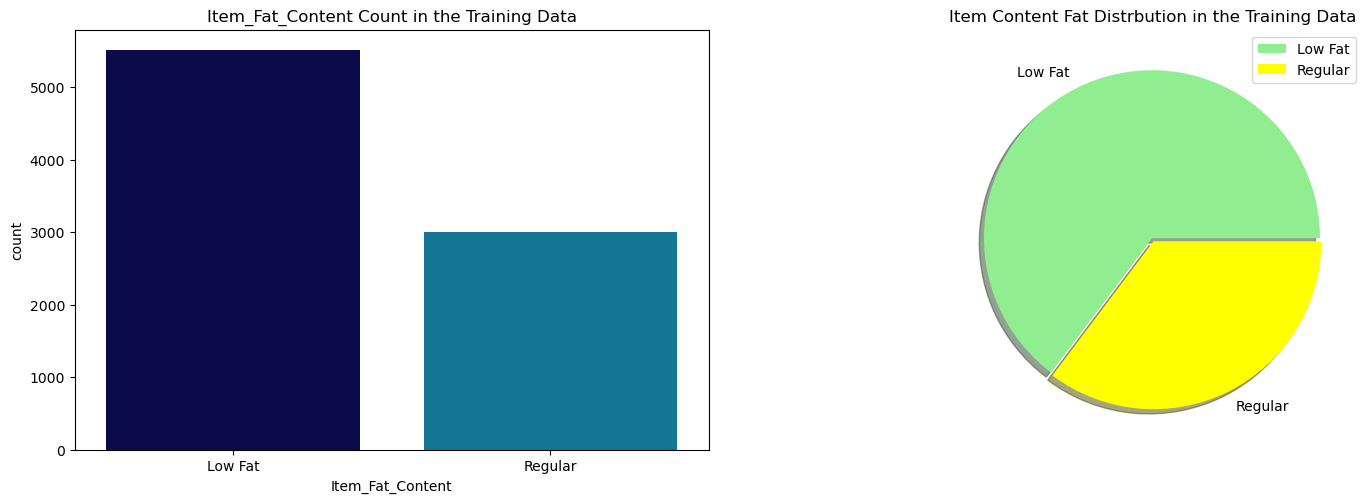

In [145]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("Item_Fat_Content Count in the Training Data")
sns.countplot(x='Item_Fat_Content', data=train, palette='ocean')

plt.subplot(2,2,2)
low_fat = train.Item_Fat_Content[train.Item_Fat_Content == 'Low Fat'].count()
reg = train.Item_Fat_Content[train.Item_Fat_Content == 'Regular'].count()
plt.title("Item Content Fat Distrbution in the Training Data")
plt.pie([low_fat, reg], labels=['Low Fat', 'Regular'], explode=[0.01,0.01], colors=['lightgreen', 'yellow'], shadow=True)
plt.legend()


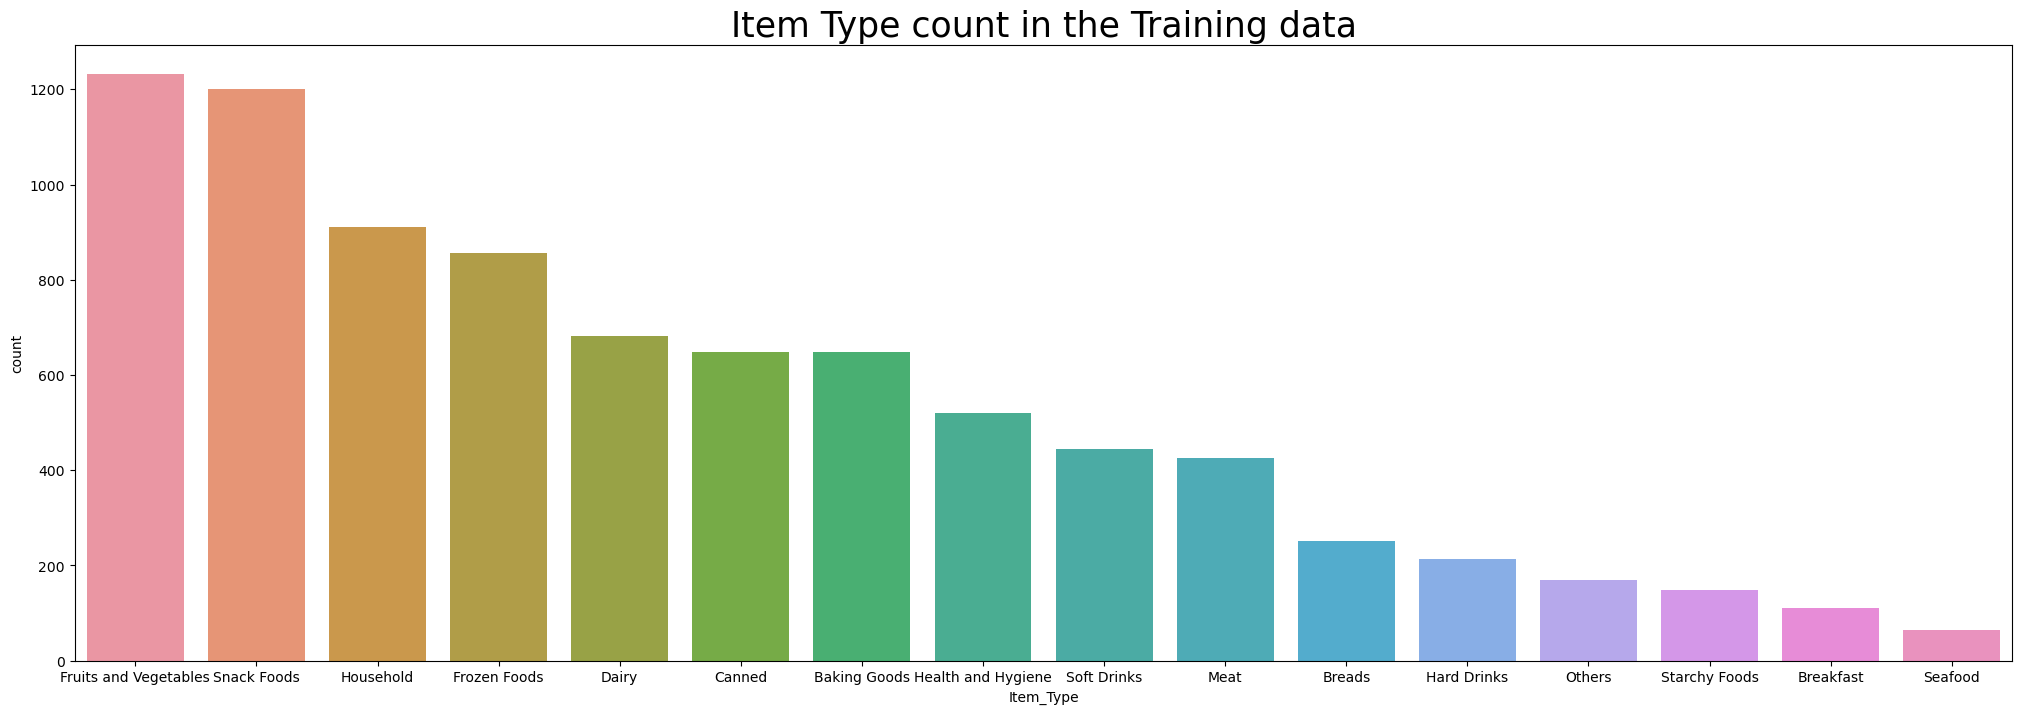

In [146]:
plt.figure(figsize=(25,8))
plt.title("Item Type count in the Training data", {"fontsize" : 25})
order = train.groupby('Item_Type').count().sort_values(by='Item_Outlet_Sales', ascending=False).index
sns.countplot(x='Item_Type', data=train, order=order);

In [147]:
train.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

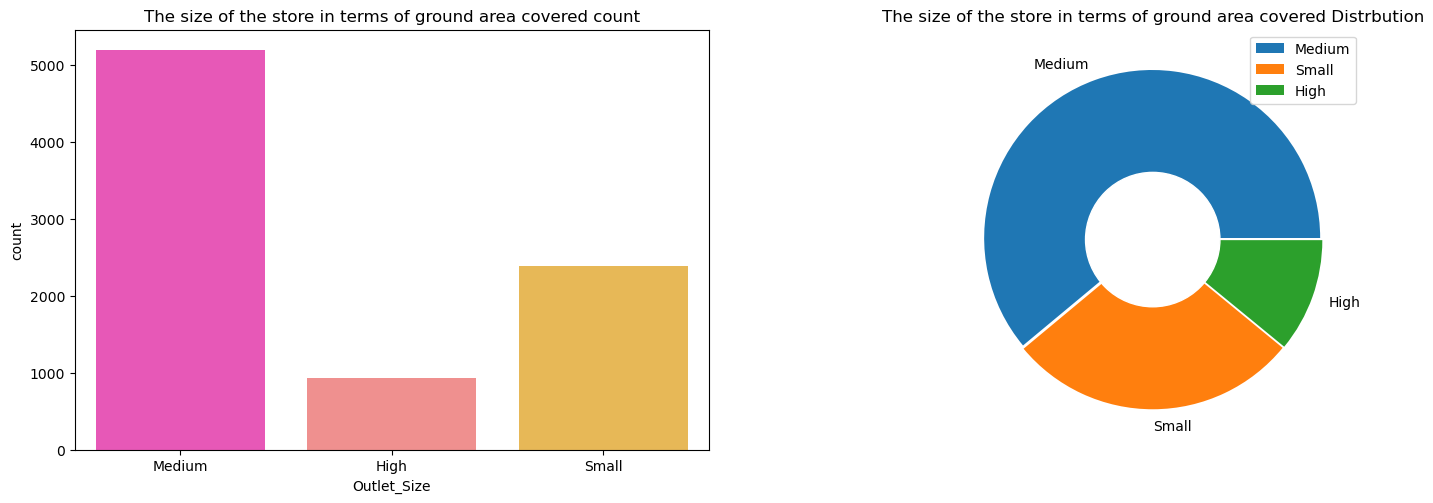

In [148]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("The size of the store in terms of ground area covered count")
sns.countplot(x='Outlet_Size', data=train, palette='spring')

plt.subplot(2,2,2)
medium = train.Outlet_Size[train.Outlet_Size == 'Medium'].count()
small = train.Outlet_Size[train.Outlet_Size == 'Small'].count()
high = train.Outlet_Size[train.Outlet_Size == 'High'].count()
plt.title("The size of the store in terms of ground area covered Distrbution")
plt.pie([medium, small, high], labels=['Medium', 'Small', 'High'], explode=[0.01,0.01,0.01])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend()


In [149]:
train.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [150]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

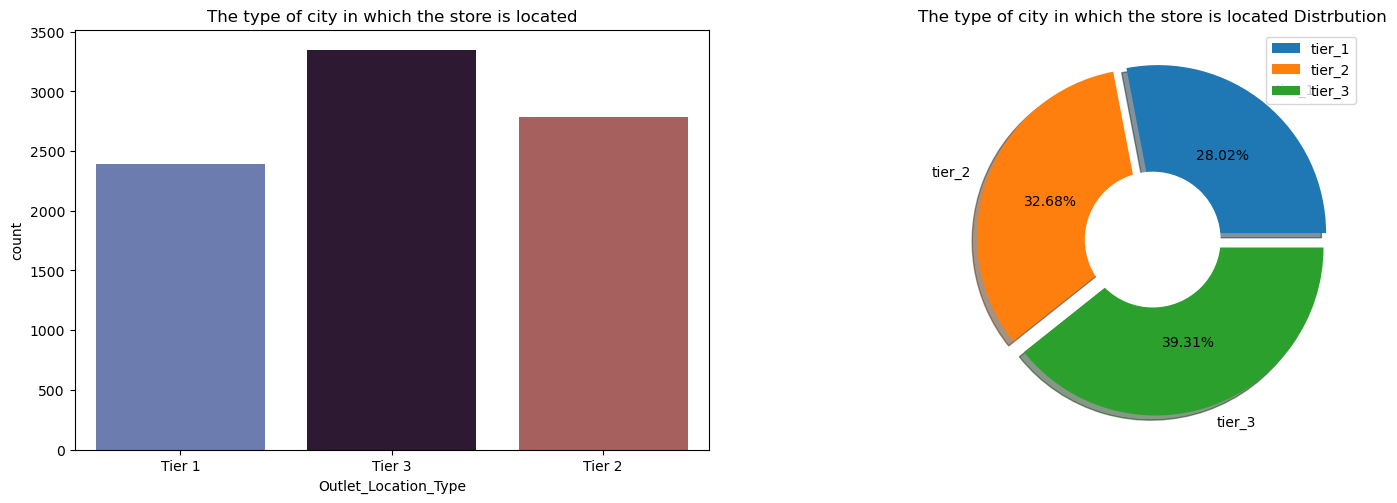

In [151]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("The type of city in which the store is located")
sns.countplot(x='Outlet_Location_Type', data=train, palette='twilight')

plt.subplot(2,2,2)
tier_1 = train.Outlet_Location_Type[train.Outlet_Location_Type == 'Tier 1'].count()
tier_2 = train.Outlet_Location_Type[train.Outlet_Location_Type == 'Tier 2'].count()
tier_3 = train.Outlet_Location_Type[train.Outlet_Location_Type == 'Tier 3'].count()
plt.title("The type of city in which the store is located Distrbution")
plt.pie([tier_1, tier_2, tier_3], labels=['tier_1', 'tier_2', 'tier_3'], autopct="%.2f%%", shadow=True, explode=[0.05,0.05,0.05])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend()


In [152]:
train.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [153]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<Axes: title={'center': 'Whether the outlet is just a grocery store or some sort of supermarket count'}, xlabel='Outlet_Type', ylabel='count'>

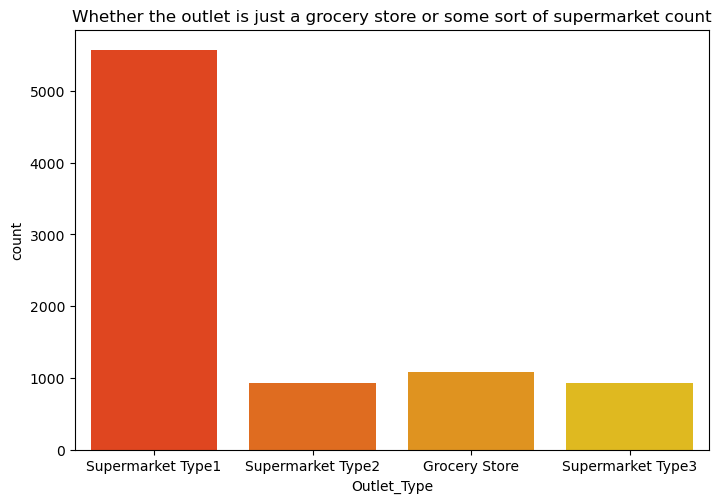

In [154]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("Whether the outlet is just a grocery store or some sort of supermarket count")
sns.countplot(x='Outlet_Type', data=train, palette='autumn')



In [155]:
train.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [156]:
train['Age'] = 2021 - train.Outlet_Establishment_Year
test['Age'] = 2021 - test.Outlet_Establishment_Year

C:\Users\admin\AppData\Local\Temp\ipykernel_16224\504210744.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)


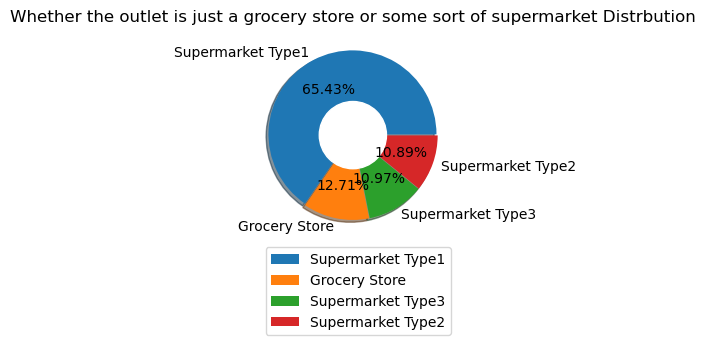

In [157]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age', data=train, palette='autumn');
plt.subplot(2,2,2)
sup_1 = train.Outlet_Type[train.Outlet_Type == 'Supermarket Type1'].count()
goc = train.Outlet_Type[train.Outlet_Type == 'Grocery Store'].count()
sup_3 = train.Outlet_Type[train.Outlet_Type == 'Supermarket Type3'].count()
sup_2 = train.Outlet_Type[train.Outlet_Type == 'Supermarket Type2'].count()
plt.title("Whether the outlet is just a grocery store or some sort of supermarket Distrbution")
plt.pie([sup_1, goc, sup_3, sup_2], labels=['Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2'], autopct="%.2f%%", shadow=True, explode=[0.01,0.01,0.01, 0.01])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend(bbox_to_anchor=(1, 0))

plt.show()

In [158]:
train.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
Age                             9
dtype: int64

In [159]:
FEATURES = [col for col in train.columns if col not in ['Item_Outlet_Sales', 'Outlet_Identifier']]
cat_features = [col for col in FEATURES if train[col].nunique() < 10]
cont_features = [col for col in FEATURES if train[col].nunique() >= 10]

In [160]:
cat_features

['Item_Fat_Content',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Age']

In [161]:
cont_features

['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP']

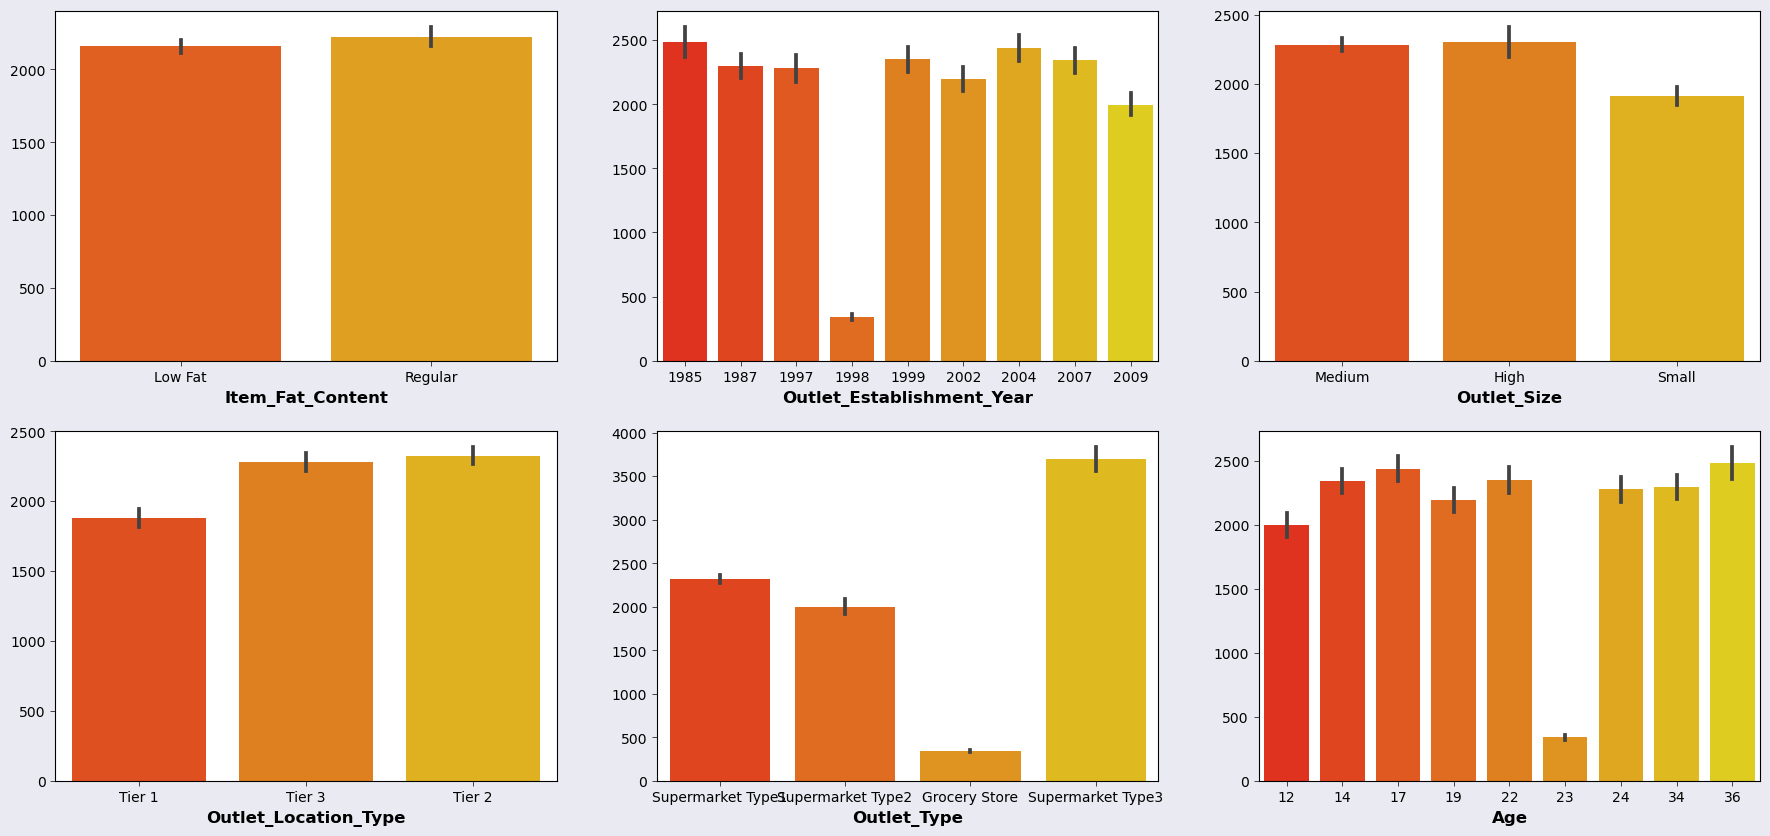

In [162]:
ncols = 3
nrows = int(len(cat_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cat_features[r*ncols+c]
        sns.barplot(y=train['Item_Outlet_Sales'], x=train[col], ax=axes[r, c], palette='autumn', label='Train data')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=12, fontweight='bold')
        axes[r, c].tick_params(labelsize=10, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_16224\2481137888.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order=train.groupby('Item_Type').mean().sort_values(by='Item_Outlet_Sales', ascending=False).index


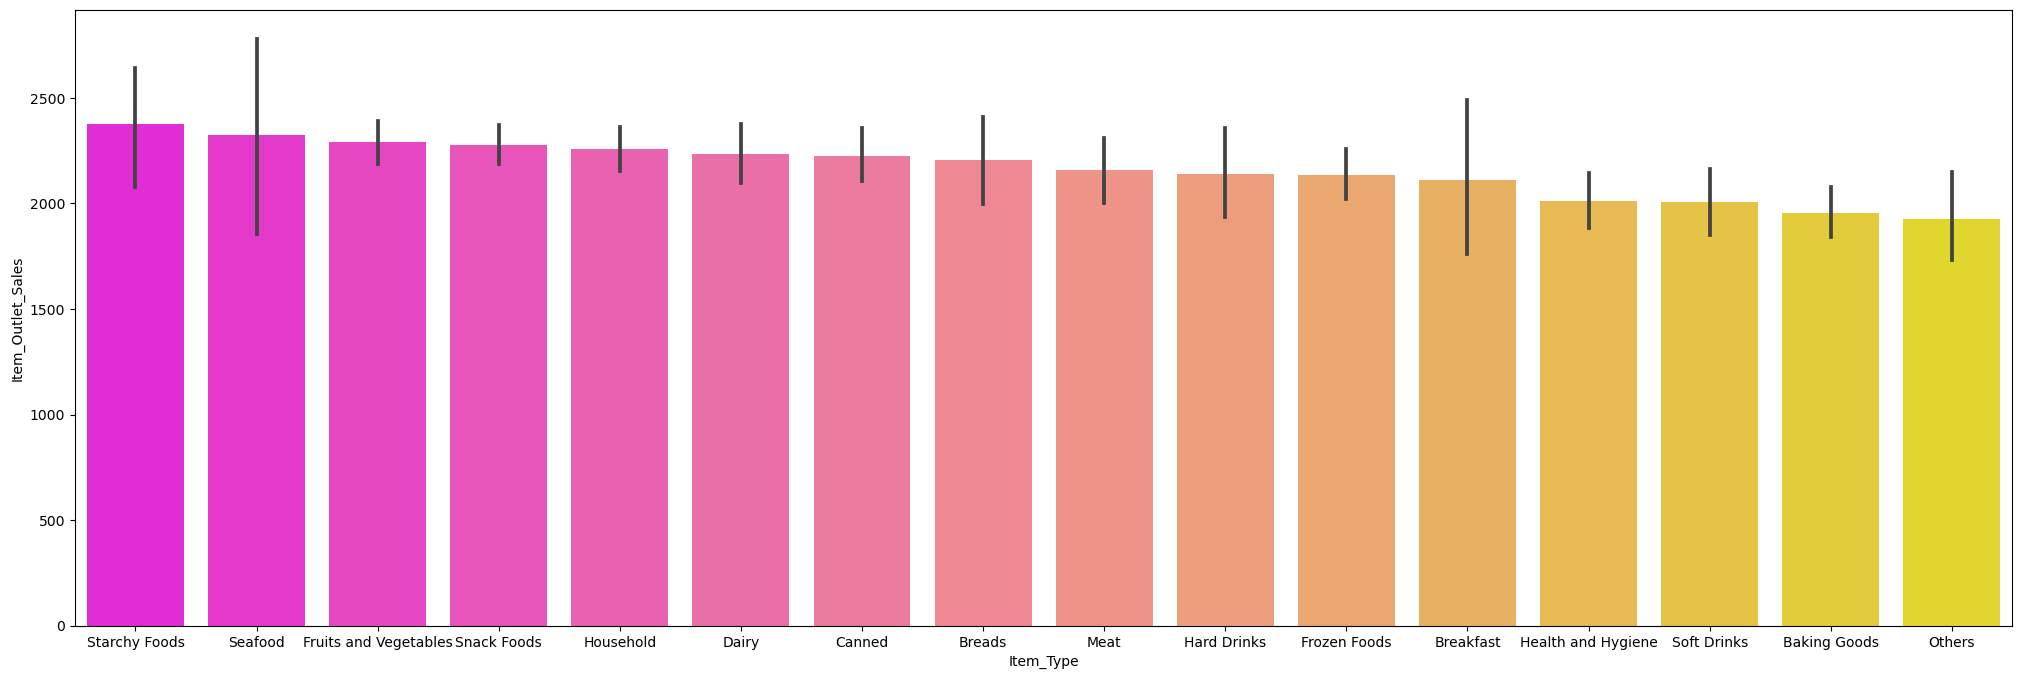

In [163]:
plt.figure(figsize=(25,8))
order=train.groupby('Item_Type').mean().sort_values(by='Item_Outlet_Sales', ascending=False).index
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train,palette='spring', order=order);

In [164]:
train.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
Age                             9
dtype: int64

In [165]:
FEATURES = [col for col in train.columns if col not in ['Item_Outlet_Sales', 'Outlet_Identifier', 'Item_Identifier']]
cat_features = [col for col in FEATURES if train[col].nunique() < 25]
cont_features = [col for col in FEATURES if train[col].nunique() >= 25]

In [166]:
cont_features

['Item_Weight', 'Item_Visibility', 'Item_MRP']

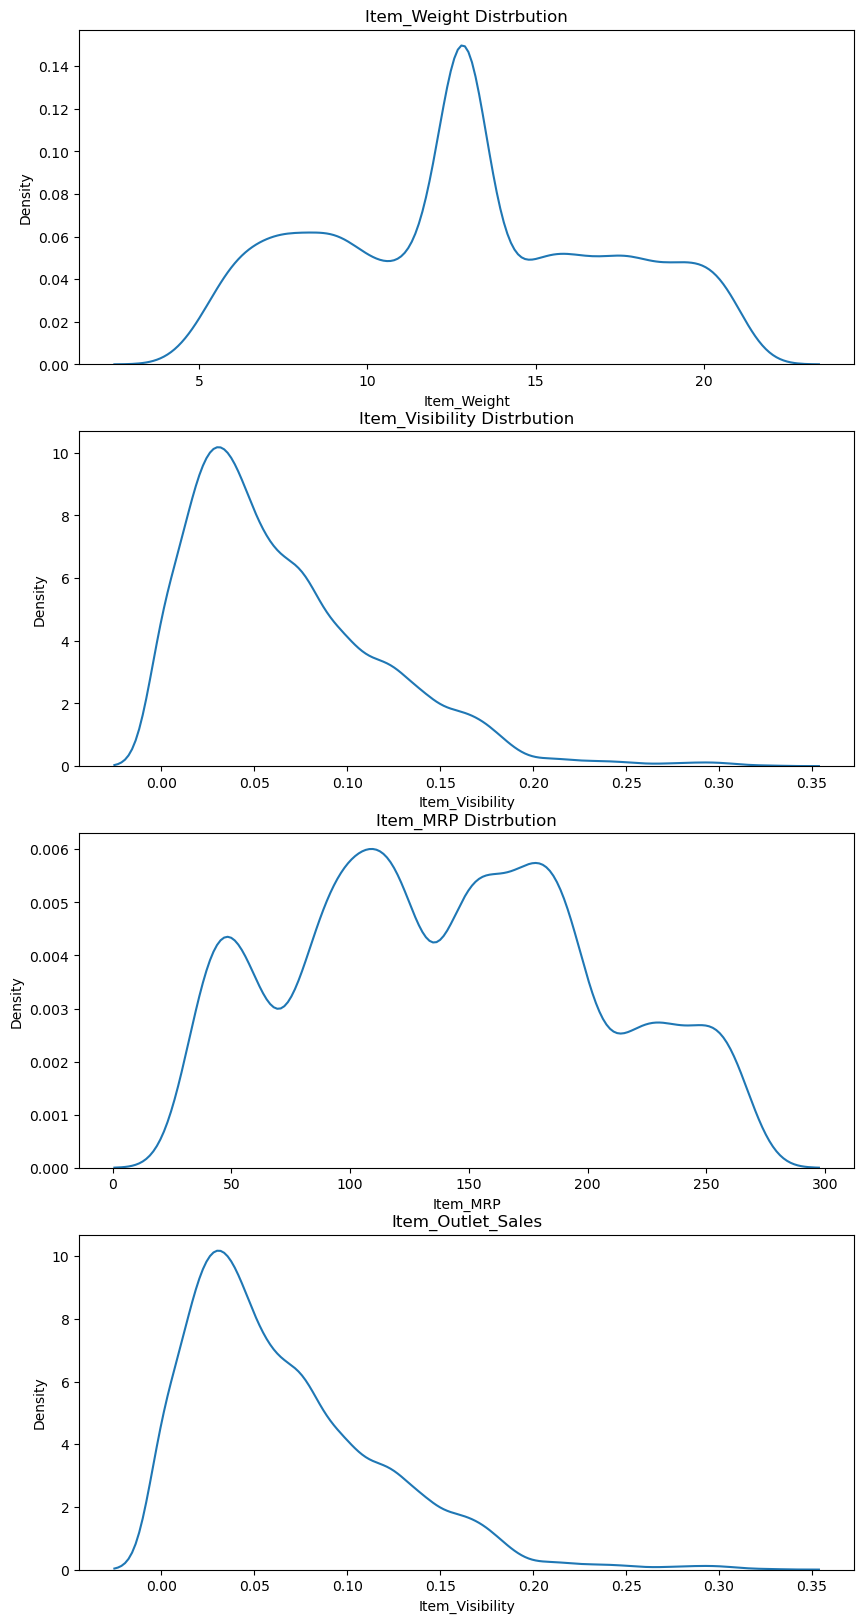

In [167]:
plt.figure(figsize=(10,20))
plt.subplot(4,1,1)
plt.title("Item_Weight Distrbution")
sns.kdeplot(x='Item_Weight', data=train)

plt.subplot(4,1,2)
plt.title("Item_Visibility Distrbution")
sns.kdeplot(x='Item_Visibility', data=train);

plt.subplot(4,1,3)
plt.title("Item_MRP Distrbution")
sns.kdeplot(x='Item_MRP', data=train);

plt.subplot(4,1,4)
plt.title("Item_Outlet_Sales")
sns.kdeplot(x='Item_Visibility', data=train);

In [168]:
train.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
Age                             9
dtype: int64

In [169]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Age                            int64
dtype: object

In [170]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Age                            int64
dtype: object

In [171]:
train.columns[train.isna().any()]

Index([], dtype='object')

In [172]:
encode = LabelEncoder()
list_transform = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type']

for i in list_transform:
    train[i] = encode.fit_transform(train[i])
    
for i in list_transform:
    test[i] = encode.fit_transform(test[i])

In [173]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
Age                            int64
dtype: object

In [174]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Age                            int64
dtype: object

In [175]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [176]:
train.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_16224\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
Item_Weight,1.000000,-0.021157,-0.012049,0.024756,-0.007225,0.004088,-0.000566,0.011550,0.008301
Item_Fat_Content,-0.021157,1.000000,0.047314,0.006063,-0.000622,-0.001598,0.002199,0.018719,-0.003151
Item_Visibility,-0.012049,0.047314,1.000000,-0.001315,0.069309,-0.028099,-0.173468,-0.128625,0.074834
Item_MRP,0.024756,0.006063,-0.001315,1.000000,0.006059,0.000232,-0.001975,0.567574,-0.005020
Outlet_Size,-0.007225,-0.000622,0.069309,0.006059,1.000000,-0.614311,-0.201483,-0.086182,-0.193389
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.000232,-0.614311,1.000000,0.467219,0.089367,0.089216
Outlet_Type,-0.000566,0.002199,-0.173468,-0.001975,-0.201483,0.467219,1.000000,0.401522,0.122304
Item_Outlet_Sales,0.011550,0.018719,-0.128625,0.567574,-0.086182,0.089367,0.401522,1.000000,0.049135
Age,0.008301,-0.003151,0.074834,-0.005020,-0.193389,0.089216,0.122304,0.049135,1.000000


C:\Users\admin\AppData\Local\Temp\ipykernel_16224\3580491061.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True);


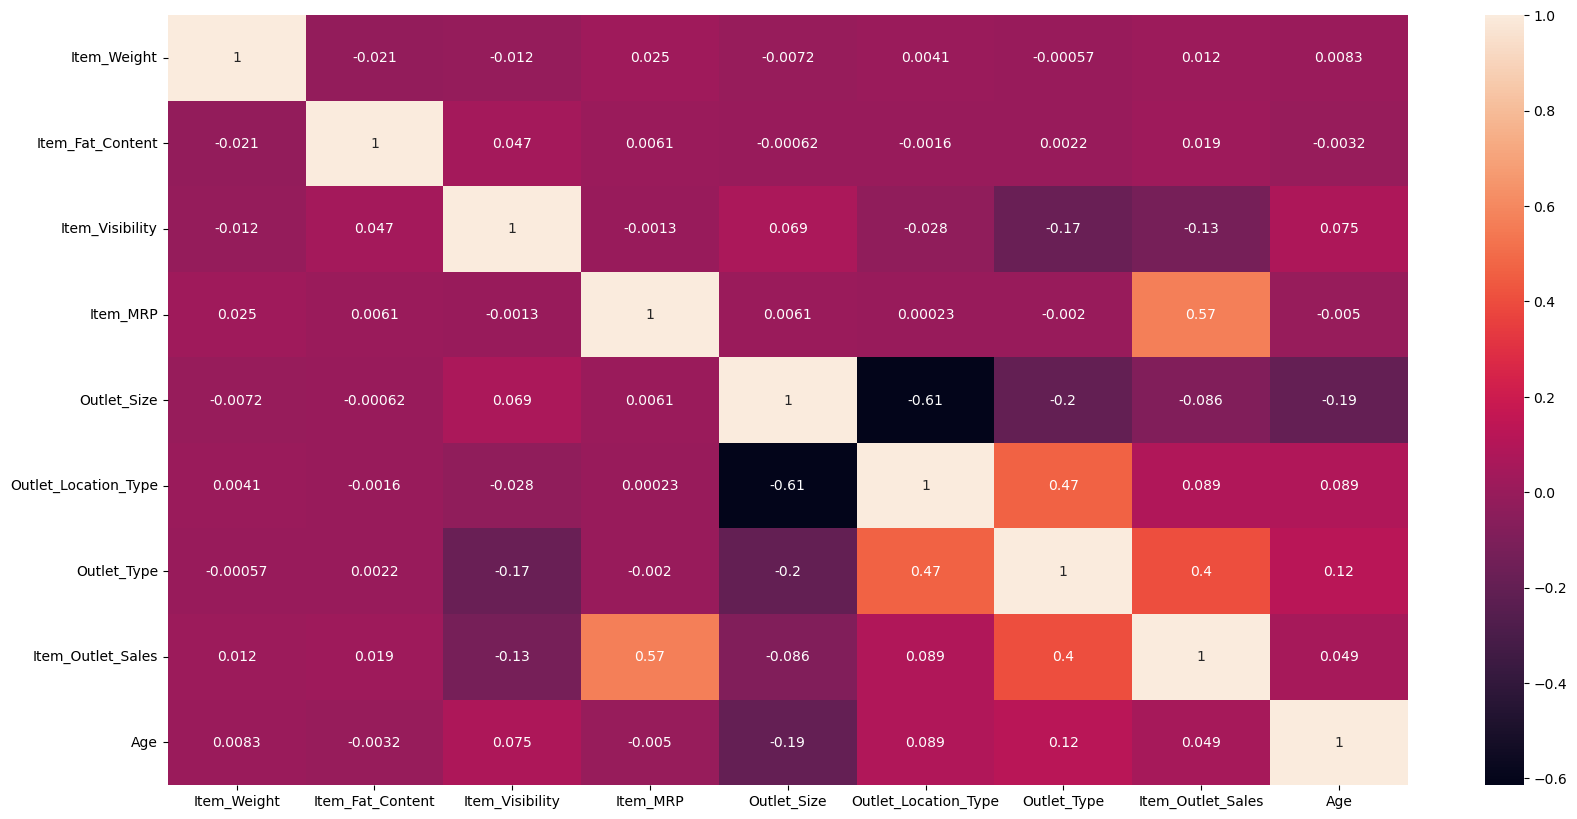

In [177]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot=True);

In [178]:
dummies1 = pd.get_dummies(train.Item_Type)
dummies2 = pd.get_dummies(test.Item_Type)
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,9.30,0,0.016047,Dairy,249.8092,1,0,1,3735.1380,22
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228,12
2,17.50,0,0.016760,Meat,141.6180,1,0,1,2097.2700,22
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,0,732.3800,23
4,8.93,0,0.000000,Household,53.8614,0,2,1,994.7052,34


In [179]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,20.750000,1,0.007565,Snack Foods,107.8622,1,0,1,22
1,8.300000,4,0.038428,Dairy,87.3198,1,1,1,14
2,14.600000,1,0.099575,Others,241.7538,1,2,0,23
3,7.315000,1,0.015388,Snack Foods,155.0340,1,1,1,14
4,12.695633,2,0.118599,Dairy,234.2300,1,2,3,36


In [180]:
train = pd.concat([train, dummies1], axis=1)
test = pd.concat([test, dummies2], axis=1)

In [181]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0,0.016047,Dairy,249.8092,1,0,1,3735.1380,22,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228,12,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,Meat,141.6180,1,0,1,2097.2700,22,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,0,732.3800,23,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,Household,53.8614,0,2,1,994.7052,34,...,0,0,0,1,0,0,0,0,0,0


In [182]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,Baking Goods,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,20.750000,1,0.007565,Snack Foods,107.8622,1,0,1,22,0,...,0,0,0,0,0,0,0,1,0,0
1,8.300000,4,0.038428,Dairy,87.3198,1,1,1,14,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,1,0.099575,Others,241.7538,1,2,0,23,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315000,1,0.015388,Snack Foods,155.0340,1,1,1,14,0,...,0,0,0,0,0,0,0,1,0,0
4,12.695633,2,0.118599,Dairy,234.2300,1,2,3,36,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
train.drop(['Item_Type', 'Starchy Foods'], axis=1, inplace=True)
test.drop(['Item_Type', 'Starchy Foods'], axis=1, inplace=True)

In [184]:
cont_features

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [185]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,Baking Goods,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,22,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,1,2,2,443.4228,12,0,...,0,0,0,0,0,0,0,0,0,1
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,22,0,...,0,0,0,0,0,1,0,0,0,0
3,19.20,1,0.000000,182.0950,1,2,0,732.3800,23,0,...,0,1,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,0,2,1,994.7052,34,0,...,0,0,0,0,1,0,0,0,0,0


In [186]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,Baking Goods,Breads,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,20.750000,1,0.007565,107.8622,1,0,1,22,0,0,...,0,0,0,0,0,0,0,0,1,0
1,8.300000,4,0.038428,87.3198,1,1,1,14,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,1,0.099575,241.7538,1,2,0,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,7.315000,1,0.015388,155.0340,1,1,1,14,0,0,...,0,0,0,0,0,0,0,0,1,0
4,12.695633,2,0.118599,234.2300,1,2,3,36,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
X = train[cont_features]
X.head()

,Item_Weight,Item_Visibility,Item_MRP
0,9.30,0.016047,249.8092
1,5.92,0.019278,48.2692
2,17.50,0.016760,141.6180
3,19.20,0.000000,182.0950
4,8.93,0.000000,53.8614


In [188]:
test2 = test[cont_features]
test2.head()

,Item_Weight,Item_Visibility,Item_MRP
0,20.750000,0.007565,107.8622
1,8.300000,0.038428,87.3198
2,14.600000,0.099575,241.7538
3,7.315000,0.015388,155.0340
4,12.695633,0.118599,234.2300


In [189]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
test2 = scaler.fit_transform(test2)

In [190]:
X = pd.DataFrame(X, columns=cont_features)
test2 = pd.DataFrame(test2, columns=cont_features)

X.head()



,Item_Weight,Item_Visibility,Item_MRP
0,-0.841872,-0.970732,1.747454
1,-1.641706,-0.908111,-1.489023
2,1.098554,-0.956917,0.010040
3,1.500838,-1.281758,0.660050
4,-0.929428,-1.281758,-1.399220


In [191]:
test2.head()

,Item_Weight,Item_Visibility,Item_MRP
0,1.897460e+00,-1.134077,-0.536555
1,-1.035530e+00,-0.531850,-0.868937
2,4.486336e-01,0.661316,1.629848
3,-1.267578e+00,-0.981416,0.226697
4,4.184768e-16,1.032540,1.508110


In [192]:
FEATURES = [col for col in train.columns if col not in ['Item_Outlet_Sales']]
FEATURES

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Age',
 'Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks']

In [193]:
cat_features = [col for col in FEATURES if train[col].nunique() < 25]
cat_features

['Item_Fat_Content',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Age',
 'Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks']

In [194]:
X = pd.concat([X, train[cat_features]], axis=1)
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,Baking Goods,Breads,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,-0.841872,-0.970732,1.747454,0,1,0,1,22,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.641706,-0.908111,-1.489023,1,1,2,2,12,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.098554,-0.956917,0.010040,0,1,0,1,22,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.500838,-1.281758,0.660050,1,1,2,0,23,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.929428,-1.281758,-1.399220,0,0,2,1,34,0,0,...,0,0,0,0,1,0,0,0,0,0


In [195]:
y = train.Item_Outlet_Sales
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [196]:
test2 = pd.concat([test2, test[cat_features]], axis=1)
test2.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,Baking Goods,Breads,...,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks
0,1.897460e+00,-1.134077,-0.536555,1,1,0,1,22,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-1.035530e+00,-0.531850,-0.868937,4,1,1,1,14,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.486336e-01,0.661316,1.629848,1,1,2,0,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.267578e+00,-0.981416,0.226697,1,1,1,1,14,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.184768e-16,1.032540,1.508110,2,1,2,3,36,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
train.shape

(8523, 24)

In [198]:
X.shape

(8523, 23)

In [199]:
test.shape

(5681, 23)

In [200]:
test2.shape

(5681, 23)

In [201]:
from sklearn. model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42)

In [203]:
rnd=RandomForestRegressor(n_estimators=50) #creating ab for rc

In [204]:
rnd.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [207]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%")

In [208]:
rf_model = RandomForestRegressor()
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")

Random Forest score on cross validation: 55.20438597115057%
Random Forest model score on Training data: 93.80067704920822%
Random Forest model score on Testing data: 54.948789187045065%


In [ ]:
r2(rf_model, "Random Forest")

In [ ]:
gbr = GradientBoostingRegressor()
kfolds(gbr, "Gradient Boosting")
train(gbr, "Gradient Boosting")

In [ ]:
r2(gbr, "Gradient Boosting")

In [ ]:
br = BaggingRegressor()
kfolds(br, "Bagging")
train(br, "Bagging")

In [ ]:
r2(br, "Bagging")

In [ ]:
lr = LinearRegression()
kfolds(lr, "Linear Regression")
train(lr, "Linear Regression")

In [ ]:
r2(lr, "Linear Regression")

In [215]:
svr = SVR(gamma='auto', kernel='poly', C=15)
kfolds(svr, "SVR")
train(svr, "SVR")

SVR score on cross validation: 51.941077270878786%
SVR model score on Training data: 52.7467076273606%
SVR model score on Testing data: 52.499553708806104%


In [216]:
r2(svr, "SVM")

R2 Score for SVM is 52.499553708806104%


In [217]:
dtr = DecisionTreeRegressor()
kfolds(dtr, "Decision Tree")
train(dtr, "Decision Tree")

Decision Tree score on cross validation: 18.18365751897959%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 17.677237537586098%


In [218]:
r2(dtr, "Decision Tree")

R2 Score for Decision Tree is 17.677237537586098%


In [219]:
xgboost = XGBRegressor()
kfolds(xgboost, "XGBoost")
train(xgboost, "XGBoost")

XGBoost score on cross validation: 51.512472077896795%
XGBoost model score on Training data: 86.22711672503168%
XGBoost model score on Testing data: 52.29654731267554%


In [220]:
pip install export_graphviz

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement export_graphviz (from versions: none)
ERROR: No matching distribution found for export_graphviz


In [221]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [226]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


In [223]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42)

In [224]:
cls=DecisionTreeClassifier()
reg=DecisionTreeRegressor()

In [227]:
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [228]:
prd=reg.predict(X_test)

In [229]:
prd

array([ 805.618 , 1249.0408,  479.376 , ..., 6851.082 , 3243.7776,
       3159.8868])

In [234]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_absolute_error(y_test,prd)
mse

1045.2575725011732

In [235]:
m=r2_score(y_test,prd)
m

0.17764178945681885